<a href="https://colab.research.google.com/github/Razan-SM2/PicLingo/blob/main/baseLine_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# step1 : downolad the dataset and select a random 300 sample, save it locally on my device.. Then view some sample to check it :

In [ ]:
# Install the required library
!pip install pycocotools

# Download and extract the MS COCO dataset
!mkdir data
!wget http://images.cocodataset.org/zips/train2017.zip
!unzip train2017.zip -d data

Streaming output truncated to the last 5000 lines.
 extracting: data/train2017/000000259556.jpg  
 extracting: data/train2017/000000381931.jpg  
 extracting: data/train2017/000000569592.jpg  
 extracting: data/train2017/000000229396.jpg  
 extracting: data/train2017/000000488990.jpg  
 extracting: data/train2017/000000348684.jpg  
 extracting: data/train2017/000000234031.jpg  
 extracting: data/train2017/000000563584.jpg  
 extracting: data/train2017/000000276069.jpg  
 extracting: data/train2017/000000401194.jpg  
 extracting: data/train2017/000000502089.jpg  
 extracting: data/train2017/000000192183.jpg  
 extracting: data/train2017/000000425127.jpg  
 extracting: data/train2017/000000126766.jpg  
 extracting: data/train2017/000000324161.jpg  
 extracting: data/train2017/000000452746.jpg  
 extracting: data/train2017/000000423782.jpg  
 extracting: data/train2017/000000546343.jpg  
 extracting: data/train2017/000000249290.jpg  
 extracting: data/train2017/000000025529.jpg  
 extracti

In [ ]:
from pycocotools.coco import COCO
import requests
import os
import zipfile

# Specify the data directory
data_dir = 'data/'

# Create the data directory if it doesn't exist
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

# Download and extract the annotations file
annotations_url = 'http://images.cocodataset.org/annotations/annotations_trainval2017.zip'
annotations_zip = os.path.join(data_dir, 'annotations_trainval2017.zip')

if not os.path.exists(annotations_zip):
    response = requests.get(annotations_url, stream=True)
    with open(annotations_zip, 'wb') as f:
        for chunk in response.iter_content(chunk_size=1024):
            if chunk:
                f.write(chunk)

    # Extract the zip file
    with zipfile.ZipFile(annotations_zip, 'r') as zip_ref:
        zip_ref.extractall(data_dir)

# Load the COCO dataset
coco = COCO(os.path.join(data_dir, 'annotations', 'instances_train2017.json'))


loading annotations into memory...
Done (t=30.90s)
creating index...
index created!


In [ ]:
from pycocotools.coco import COCO

# Load the dataset
coco = COCO('data/annotations/instances_train2017.json')

loading annotations into memory...
Done (t=20.08s)
creating index...
index created!


In [ ]:
# choose 300 random image ID
import random

image_ids = coco.getImgIds()
random_image_ids = random.sample(image_ids, 300)

subset_annotations = coco.loadAnns(coco.getAnnIds(imgIds=random_image_ids))
subset_images = coco.loadImgs(random_image_ids)

In [ ]:
#Save the subset locally
import os
import shutil

output_dir = 'coco_subset'
os.makedirs(output_dir, exist_ok=True)

for image_info, annotation_info in zip(subset_images, subset_annotations):
    image_path = os.path.join('data/train2017', image_info['file_name'])
    shutil.copy(image_path, output_dir)

In [ ]:
#Zip the subset for easier download
shutil.make_archive(output_dir, 'zip', output_dir)

'/content/coco_subset.zip'

In [ ]:
# Move the zip file to /content
shutil.move('coco_subset.zip', '/content/coco_subset.zip')

# Provide a download link for the zip file
from google.colab import files
files.download('/content/coco_subset.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

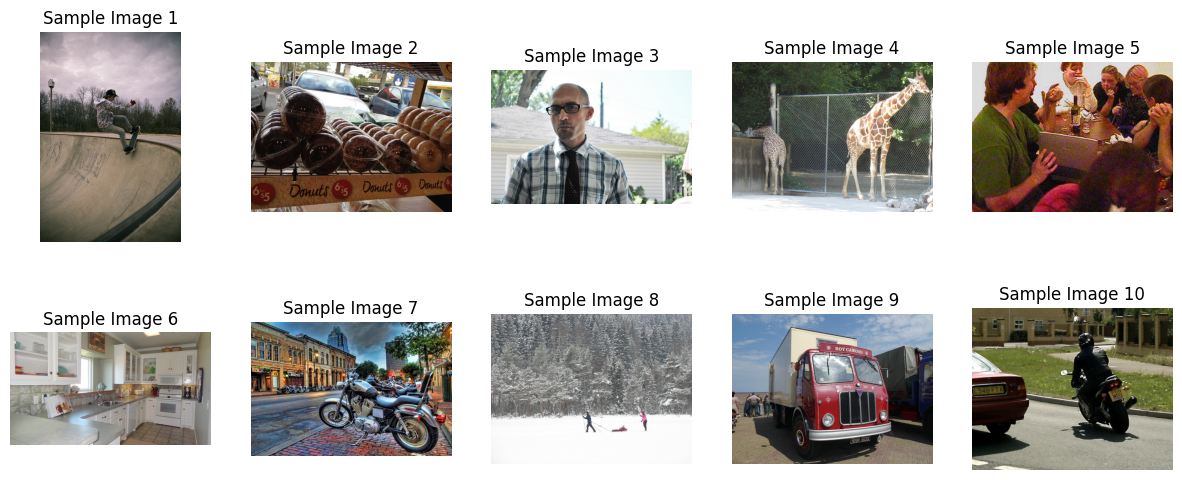

In [1]:
import os
from PIL import Image
import IPython.display as display
import matplotlib.pyplot as plt

# Specify the path to the folder containing the images
folder_path = '/content/coco_subset'

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Display images in a grid
num_samples = 10  # how many samples you want to display
rows = 2           # Number of rows in the grid

fig, axes = plt.subplots(rows, num_samples // rows, figsize=(15, 3 * rows))

for i in range(num_samples):
    image_path = os.path.join(folder_path, image_files[i])
    img = Image.open(image_path)

    axes[i // (num_samples // rows), i % (num_samples // rows)].imshow(img)
    axes[i // (num_samples // rows), i % (num_samples // rows)].axis('off')
    axes[i // (num_samples // rows), i % (num_samples // rows)].set_title(f"Sample Image {i + 1}")

plt.show()

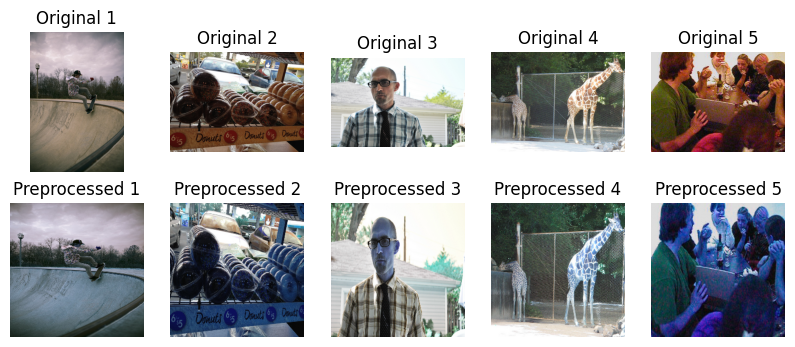

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Specify the path to the folder containing the images
folder_path = '/content/coco_subset'

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Preprocessing parameters
target_size = (256, 256)

# Number of examples to display
num_examples = 5

# Placeholder for preprocessed images
preprocessed_images = []

for i in range(min(num_examples, len(image_files))):
    image_path = os.path.join(folder_path, image_files[i])

    # Read the image using OpenCV
    img = cv2.imread(image_path)

    # Resize the image
    img_resized = cv2.resize(img, target_size)

    # Normalize the pixel values to the range [0, 1]
    img_normalized = img_resized / 255.0

    preprocessed_images.append(img_normalized)

# Convert the list to a NumPy array
preprocessed_images = np.array(preprocessed_images)

# Display the original and preprocessed images side by side
fig, axes = plt.subplots(2, num_examples, figsize=(10, 4))

for i in range(min(num_examples, len(image_files))):
    image_path = os.path.join(folder_path, image_files[i])
    img = Image.open(image_path)

    axes[0, i].imshow(img)
    axes[0, i].axis('off')
    axes[0, i].set_title(f"Original {i + 1}")

    axes[1, i].imshow(preprocessed_images[i])
    axes[1, i].axis('off')
    axes[1, i].set_title(f"Preprocessed {i + 1}")

plt.show()

# step 3: load the model and generate 100 image with it
the model can be found here: https://github.com/huggingface/pytorch-pretrained-BigGAN

In [3]:
pip install torch pytorch-pretrained-biggan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 13.3 MB/s eta 0:00:00


In [4]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [5]:
import torch
import numpy as np
from pytorch_pretrained_biggan import (BigGAN, one_hot_from_names, truncated_noise_sample,
                                       save_as_images, display_in_terminal)

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
logging.basicConfig(level=logging.INFO)

# Load pre-trained model tokenizer (vocabulary)
model = BigGAN.from_pretrained('biggan-deep-256')

# Prepare input for 50 images
num_images = 50
truncation = 0.4

class_vector = one_hot_from_names([
    "Dog", "Cat", "Car", "Bicycle", "Airplane",
    "Bird", "Boat", "Bus", "Truck", "Chair",
] * (num_images // 10), batch_size=num_images)

noise_vector = truncated_noise_sample(truncation=truncation, batch_size=num_images)

# Convert to tensors
noise_vector = torch.from_numpy(noise_vector)
class_vector = torch.from_numpy(class_vector)

# Generate images
with torch.no_grad():
    output = model(noise_vector, class_vector, truncation)

# Save results as png images
save_as_images(output, "generated_images")

# Convert generated images to NumPy array
generated_images_array = output.cpu().numpy()

100%|██████████| 715/715 [00:00<00:00, 518666.09B/s]


In [6]:
pip install matplotlib

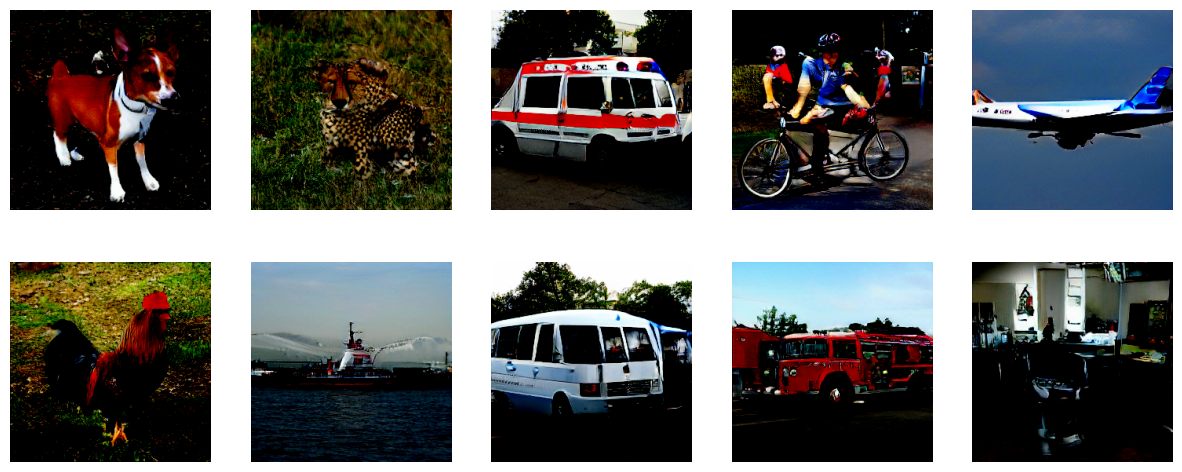

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have generated images using the previous code
# generated_images_array = output.cpu().numpy()

# Function to display images in a grid
def display_images(images, num_cols=5):
    num_images = len(images)
    num_rows = int(np.ceil(num_images / num_cols))

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))
    axes = axes.flatten()

    for i in range(num_images):
        axes[i].imshow(images[i].transpose(1, 2, 0))
        axes[i].axis('off')

    plt.show()

# Display 10 samples in a grid
display_images(generated_images_array[:10])

# Evaluation metrics

In [21]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [32]:
!pip install torch torchvision
!pip install pytorch-ignite
!pip install Pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.4/272.4 kB 2.5 MB/s eta 0:00:00
